## Dimensionality Reduction by Extracting Principal Components

In [69]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()

In [70]:
df = pd.read_csv('wine.data', header=None)
df.shape

(178, 14)

In [71]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [72]:
col_name=['class', 'Alcohol', 'Malic acid', 'Ash',	'Alcalinity of ash', 
          'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 
          'Proanthocyanins', 'Color intensity', 'Hue', 
          'OD280/OD315 of diluted wines', 'Proline']

In [73]:
df.columns = col_name

In [74]:
X = df.iloc[:, 1:]
X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [75]:
y = df['class']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [76]:
from sklearn.model_selection import train_test_split                     # Train_test_split is a function in Sklearn model 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, # selection for splitting data arrays into two subsets:
                                                    random_state=42)     # for training data and for testing data.

In [77]:
from sklearn.preprocessing import StandardScaler # StandardScaler standardizes a feature by subtracting 
sc = StandardScaler()                            # the mean and then scaling to unit variance.

In [78]:
sc.fit(X_train)
X_train_sc = sc.transform(X_train) # To project each row of your data into the  
X_test_sc = sc.transform(X_test)   # vector space that was learned when fit was called.

In [79]:
from sklearn.decomposition import PCA

In [80]:
pca = PCA(n_components=2)  # 1.Initialize the PCA class by passing the number of components to the constructor.
pca.fit(X_train_sc)        # 2.Call the fit and then transform methods by passing the feature set to these methods. 
                           #   The transform method returns the specified number of principal components.

PCA(n_components=2)

In [81]:
pca.explained_variance_ratio_  # Returns a vector of the variance explained by each dimension.

array([0.35900066, 0.18691934])

In [82]:
print(np.round(pca.explained_variance_ratio_ , 3))

[0.359 0.187]


In [83]:
pd.DataFrame(np.round(pca.components_, 3), columns = X.columns).T 

,0,1
Alcohol,0.128,-0.493
Malic acid,-0.256,-0.190
Ash,-0.022,-0.317
Alcalinity of ash,-0.244,0.035
Magnesium,0.148,-0.262
Total phenols,0.385,-0.096
Flavanoids,0.420,-0.015
Nonflavanoid phenols,-0.299,-0.076
Proanthocyanins,0.308,-0.074
Color intensity,-0.119,-0.534


No preconcieved idea of the number of PCAs we want.

In [84]:
pca = PCA(n_components = None) #To see the relationship between the number of components and cumulative explained variance.
pca.fit(X_train_sc)

PCA()

In [85]:
pca.transform(X_train_sc)

array([[-1.16602698, -3.61532732,  1.15128454, ..., -0.1121504 ,
         0.07147567, -0.75559169],
       [-3.86261156, -0.48217746,  1.72758428, ...,  0.50457041,
        -0.18288356, -0.122403  ],
       [ 2.28353786,  1.27503318, -0.13167658, ...,  0.48017987,
        -0.45893296,  0.41585049],
       ...,
       [ 4.22339048, -2.40345929, -1.13704654, ..., -0.12930554,
        -0.20588086, -0.04785505],
       [-1.80527275,  1.49091985, -0.08991142, ..., -0.50730299,
        -0.48437788,  0.46676777],
       [-0.07808699,  1.19327925,  1.04439979, ..., -0.24025144,
         0.05180158, -0.28153725]])

In [86]:
print(np.round(pca.explained_variance_ratio_, 3)) # PCA perform the computation for biospheres as long as it can, usually 10.

[0.359 0.187 0.116 0.074 0.067 0.049 0.042 0.027 0.023 0.019 0.017 0.013
 0.008]


In [87]:
np.cumsum(pca.explained_variance_ratio_) # Return the cumulative sum of the elements along a given axis.
                                         # In the project return the percentage of the variance to be explained.

array([0.35900066, 0.54592   , 0.66198557, 0.73570273, 0.80224132,
       0.85078714, 0.89273756, 0.91957678, 0.94305138, 0.96194872,
       0.97910815, 0.99173743, 1.        ])

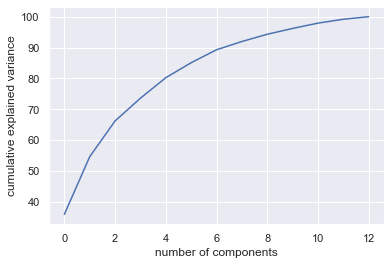

In [88]:
plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100.) # Data visualization and graphical plotting.
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [89]:
res = pca.transform(X_train_sc)
index_name = ['PCA_'+str(k) for k in range(0, len(res))]

In [90]:
df1 = pd.DataFrame(res, index = index_name)[0:4]
df1.T.sort_values(by='PCA_0') # descending sort by PCA_0.

,PCA_0,PCA_1,PCA_2,PCA_3
1,-3.615327,-0.482177,1.275033,-2.496962
0,-1.166027,-3.862612,2.283538,-1.678507
12,-0.755592,-0.122403,0.415850,-0.791136
8,-0.639966,-0.005981,-0.481336,-0.121445
6,-0.553745,1.257686,-0.979052,-0.666927
10,-0.112150,0.504570,0.480180,-0.319599
11,0.071476,-0.182884,-0.458933,0.045823
4,0.221634,-0.226540,0.215798,-0.003420
9,0.262397,-0.453600,-0.777822,-0.123055
7,0.918085,-0.113136,-0.678263,0.150849


In [91]:
pca = PCA(n_components = 'mle') # Finally, to see the choice of dimension reduction by MLE algorithm.
pca.fit(X_train_sc)

PCA(n_components='mle')

In [92]:
pca.transform(X_train_sc)

array([[-1.16602698e+00, -3.61532732e+00,  1.15128454e+00,
         1.16717874e+00,  2.21634358e-01,  3.06237978e+00,
        -5.53745224e-01],
       [-3.86261156e+00, -4.82177461e-01,  1.72758428e+00,
         4.67086467e-01, -2.26540423e-01, -1.01651047e+00,
         1.25768625e+00],
       [ 2.28353786e+00,  1.27503318e+00, -1.31676575e-01,
         1.10782994e+00,  2.15798414e-01,  1.00431463e+00,
        -9.79051522e-01],
       [-1.67850727e+00, -2.49696152e+00,  5.56618524e-01,
         1.13126982e+00, -3.42006920e-03,  2.75477939e+00,
        -6.66926732e-01],
       [ 1.57284216e+00,  6.88203487e-01, -1.41794489e+00,
        -4.25081656e-01, -6.74013176e-01, -3.20546442e-01,
        -7.83618387e-02],
       [ 2.02555486e-01,  2.22577338e+00, -3.98618759e-01,
         8.38730936e-01,  6.89122802e-01,  1.05794603e+00,
         1.83285385e-01],
       [ 8.83338617e-01,  2.00469937e+00, -2.92836715e-01,
        -7.08377098e-01, -3.03720802e-01,  3.84587237e-02,
        -2.3495179

In [93]:
print(np.round(pca.explained_variance_ratio_, 3))

[0.359 0.187 0.116 0.074 0.067 0.049 0.042]


In [94]:
pd.DataFrame(np.round(pca.components_, 3), columns = X.columns).T

,0,1,2,3,4,5,6
Alcohol,0.128,-0.493,-0.185,0.079,-0.310,-0.186,-0.042
Malic acid,-0.256,-0.190,0.142,0.424,0.211,-0.656,0.361
Ash,-0.022,-0.317,0.610,-0.207,-0.199,-0.120,-0.180
Alcalinity of ash,-0.244,0.035,0.595,-0.054,0.094,0.127,-0.255
Magnesium,0.148,-0.262,0.066,-0.650,0.514,-0.081,0.314
Total phenols,0.385,-0.096,0.177,0.246,-0.011,0.087,-0.083
Flavanoids,0.420,-0.015,0.182,0.180,-0.032,0.012,-0.086
Nonflavanoid phenols,-0.299,-0.076,0.203,0.046,-0.459,0.322,0.615
Proanthocyanins,0.308,-0.074,0.151,0.331,0.377,0.416,0.394
Color intensity,-0.119,-0.534,-0.124,0.117,0.058,0.392,-0.181
